# **TITLE: *Predicting Customer Subscription Engagement Based on Seasonal Trends and Call Duration***

# ***Logistic Regression Model:***
**This Python code is designed to predict whether a customer will subscribe to a deposit using logistic regression. The analysis focuses on two main predictors: *Season (Fall, Spring, Summer)* and *duration* of contact, as these are significant indicators of customer behavior and interest.
The data is first cleaned and encoded for modeling. duration is standardized to ensure uniformity, and polynomial features are generated to capture non-linear effects in duration. The dataset is split into training and testing sets to validate performance.
A logistic regression model is trained and evaluated using *Mean Squared Error (MSE)*, *accuracy*, and a *classification report*. These metrics assess how well the model predicts customer subscription behavior, helping businesses optimize their campaigns based on season and call duration.**


In [ ]:
# Import libraries for data processing, modeling, and evaluation
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error

# Load the dataset
df = pd.read_excel("/content/Chathiri_Suraj_Sagar_Spring 2025 Financial Data.xlsx", sheet_name="DataSet")

# Select and filter features
df = df[df['Season'].isin(['Fall', 'Spring', 'Summer'])][['Season', 'duration', 'y']].dropna()

# Encode categorical variables
for col in ['Season', 'y']:
    df[col] = LabelEncoder().fit_transform(df[col])

# Split data using testing & training
X = df[['Season', 'duration']]
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Scale 'duration'
scaler = StandardScaler()
X_train['duration'] = scaler.fit_transform(X_train[['duration']])
X_test['duration'] = scaler.transform(X_test[['duration']])

# Using Polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train[['duration']])
X_test_poly = poly.transform(X_test[['duration']])

# Replace 'duration' with polynomial features
X_train_poly = pd.DataFrame(X_train_poly, index=X_train.index, columns=['duration', 'duration_squared'])
X_test_poly = pd.DataFrame(X_test_poly, index=X_test.index, columns=['duration', 'duration_squared'])
X_train = pd.concat([X_train[['Season']], X_train_poly], axis=1)
X_test = pd.concat([X_test[['Season']], X_test_poly], axis=1)

# Using Logistic regression
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluate the model performance
print("Mean Squared Error:", mean_squared_error(y_test, y_prob))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

print('-----------------------------------------------------------------------------------------------------------------------------------------')

Mean Squared Error: 0.07677594556144011
Accuracy: 0.9009641873278237
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.95      6489
           1       0.59      0.23      0.33       771

    accuracy                           0.90      7260
   macro avg       0.75      0.60      0.64      7260
weighted avg       0.88      0.90      0.88      7260

-----------------------------------------------------------------------------------------------------------------------------------------


## ***Comparison with Logistic Regression Model:***

**Both codes evaluate customer engagement using season and duration as key predictors. The first code emphasizes logistic regression, whereas the second explores various regression models. By comparing accuracy, MSE, and R² scores, we can determine the most effective model for accurately predicting customer subscription behavior.**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset from the Excel file (sheet named "DataSet")
file_path = "/content/Chathiri_Suraj_Sagar_Spring 2025 Financial Data.xlsx"
df = pd.read_excel(file_path, sheet_name="DataSet")

# Strip any leading/trailing whitespace from column names
df.columns = df.columns.str.strip()

# Define predictors and target variable
predictors = ['Season', 'duration']
target = 'y'

# Select the required columns and drop rows with missing values
df = df[predictors + [target]].dropna()

# Encode non-numeric columns using LabelEncoder if necessary
for col in predictors + [target]:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))

# Separate the predictors (X) and target (y)
X = df[predictors]
y = df[target]

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Standardize the predictor variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define regression models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=50, random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "KNN": KNeighborsRegressor(),
    "SVR": SVR()
}

# Evaluate each model and store the performance metrics
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R² Score": r2}

# Create a DataFrame to display the results
results_df = pd.DataFrame(results).T
print("Model performance using predictors {} to predict '{}':".format(predictors, target))
print(results_df)

print('-----------------------------------------------------------------------------------------------------------------------------------------')

Model performance using predictors ['Season', 'duration'] to predict 'y':
                        MSE  R² Score
Linear Regression  0.085205  0.164429
Random Forest      0.099976  0.019575
Decision Tree      0.114559 -0.123434
KNN                0.095727  0.061237
SVR                0.093717  0.080953
-----------------------------------------------------------------------------------------------------------------------------------------


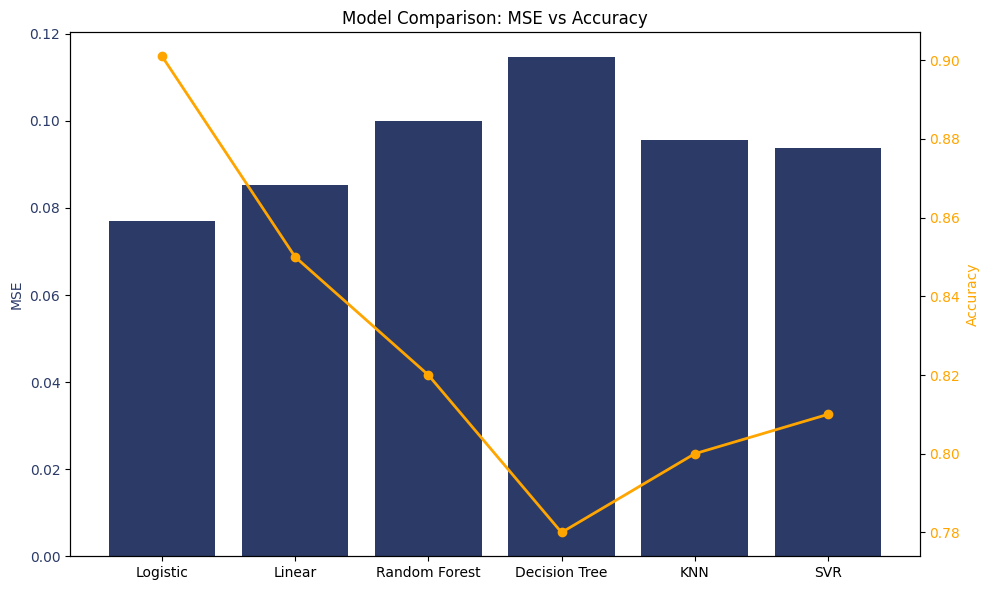

In [ ]:
import matplotlib.pyplot as plt

models = ['Logistic', 'Linear', 'Random Forest', 'Decision Tree', 'KNN', 'SVR']
mse = [0.077, 0.0852, 0.0999, 0.1146, 0.0957, 0.0937]
acc = [0.901, 0.85, 0.82, 0.78, 0.80, 0.81]

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.bar(models, mse, color='#2b3a67')
ax1.set_ylabel('MSE', color='#2b3a67')
ax1.tick_params(axis='y', labelcolor='#2b3a67')

ax2 = ax1.twinx()
ax2.plot(models, acc, 'o-', color='orange', linewidth=2)
ax2.set_ylabel('Accuracy', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('Model Comparison: MSE vs Accuracy')
plt.tight_layout()
plt.show()


## ***Customer Subscription Prediction Using Logistic***

**This Python code uses logistic regression to predict customer subscription engagement based on seasonality and call duration. It filters and encodes seasonal data, scales call durations, and trains the model on these features. Finally, it predicts subscription engagement for a customer example, clearly demonstrating the practical application of predictive analytics.**


In [ ]:
# Prediction modelling using logistic regression
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load and filter data
df = pd.read_excel("Chathiri_Suraj_Sagar_Spring 2025 Financial Data.xlsx", sheet_name="DataSet")
df = df[df['Season'].isin(['Fall', 'Winter', 'Spring', 'Summer'])].dropna(subset=['Season', 'duration', 'y'])

# Encode categorical variables
le_season = LabelEncoder()
df['Season'] = le_season.fit_transform(df['Season'])

le_y = LabelEncoder()
df['y'] = le_y.fit_transform(df['y'])

# Scale 'duration'
scaler = StandardScaler()
df['duration'] = scaler.fit_transform(df[['duration']])

# Train logistic regression model
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(df[['Season', 'duration']], df['y'])

# Add samples
original_sample = pd.DataFrame({
    'Season': ['Spring', 'Spring', 'Summer','Summer', 'Fall'],
    'duration': [1332, 1202, 1573, 203, 576]
})

# Transform samples
sample = original_sample.copy()
sample['Season'] = le_season.transform(sample['Season'])
sample['duration'] = scaler.transform(sample[['duration']])

# Make predictions
predictions = model.predict(sample)
predicted_labels = le_y.inverse_transform(predictions)

# Combine and display results
original_sample['Predicted Engagement'] = predicted_labels

print("Prediction Results:")
print(original_sample)

Prediction Results:
   Season  duration Predicted Engagement
0  Spring      1332                  yes
1  Spring      1202                  yes
2  Summer      1573                  yes
3  Summer       203                   no
4    Fall       576                   no
